# PROGETTO


In [1]:
import pandas as pd
# set up the file path 
properties = pd.read_csv("properties_2017.csv")
train = pd.read_csv("train_2017.csv" , parse_dates=["transactiondate"]) 

print("Training Size:" + str(train.shape))
print("Property Size:" + str(properties.shape))

C:\Users\victo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Training Size:(77613, 3)
Property Size:(2985217, 58)


In [2]:
#aggiunta di features in più al nostro dataframe
#living area proportions 
properties['living_area_prop'] = properties['calculatedfinishedsquarefeet'] / properties['lotsizesquarefeet']
#tax value ratio
properties['value_ratio'] = properties['taxvaluedollarcnt'] / properties['taxamount']
#tax value proportions
properties['value_prop'] = properties['structuretaxvaluedollarcnt'] / properties['landtaxvaluedollarcnt']

Sono state  anche aggiungere tre features in più non presenti nel dataframe: living_area_prop, value_ratio e value_prop.

In [3]:
houses_df = train.merge(properties, how='left', on='parcelid') #merge dataframe

In [4]:
print("Houses Size:" + str(houses_df.shape))

Houses Size:(77613, 63)


In [5]:
houses_df.info() #info per vedere le features e il loro tipo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77613 entries, 0 to 77612
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   parcelid                      77613 non-null  int64         
 1   logerror                      77613 non-null  float64       
 2   transactiondate               77613 non-null  datetime64[ns]
 3   airconditioningtypeid         25007 non-null  float64       
 4   architecturalstyletypeid      207 non-null    float64       
 5   basementsqft                  50 non-null     float64       
 6   bathroomcnt                   77579 non-null  float64       
 7   bedroomcnt                    77579 non-null  float64       
 8   buildingclasstypeid           15 non-null     float64       
 9   buildingqualitytypeid         49809 non-null  float64       
 10  calculatedbathnbr             76963 non-null  float64       
 11  decktypeid                  

In [6]:
houses_df.describe()

parcelid      logerror  airconditioningtypeid  \
count  7.761300e+04  77613.000000           25007.000000   
mean   1.300781e+07      0.016755               1.812013   
std    3.518717e+06      0.170887               2.965768   
min    1.071186e+07     -4.655420               1.000000   
25%    1.153821e+07     -0.024325               1.000000   
50%    1.253004e+07      0.006670               1.000000   
75%    1.421101e+07      0.039295               1.000000   
max    1.676893e+08      5.262999              13.000000   

       architecturalstyletypeid  basementsqft   bathroomcnt    bedroomcnt  \
count                207.000000     50.000000  77579.000000  77579.000000   
mean                   7.386473    679.720000      2.298496      3.053223   
std                    2.728030    689.703546      0.996732      1.140480   
min                    2.000000     38.000000      0.000000      0.000000   
25%                    7.000000    273.000000      2.000000      2.000000   
50%                    7.000000    515.000000      2.000000      3.000000   
75%                    7.000000    796.500000      3.000000      4.000000   
max                   21.000000   3560.000000     18.000000     16.000000   

       buildingclasstypeid  buildingqualitytypeid  calculatedbathnbr  ...  \
count            15.000000           49809.000000       76963.000000  ...   
mean              3.933333               6.533779           2.316392  ...   
std               0.258199               1.722062           0.979689  ...   
min               3.000000               1.000000           1.000000  ...   
25%               4.000000               6.000000           2.000000  ...   
50%               4.000000               6.000000           2.000000  ...   
75%               4.000000               8.000000           3.000000  ...   
max               4.000000              12.000000          18.000000  ...   

       structuretaxvaluedollarcnt  taxvaluedollarcnt  assessmentyear  \
count                7.746400e+04       7.757800e+04         77579.0   
mean                 1.892811e+05       4.901506e+05          2016.0   
std                  2.304107e+05       6.537979e+05             0.0   
min                  4.400000e+01       1.000000e+03          2016.0   
25%                  8.417925e+04       2.068985e+05          2016.0   
50%                  1.364045e+05       3.588785e+05          2016.0   
75%                  2.187340e+05       5.690000e+05          2016.0   
max                  1.142179e+07       4.906124e+07          2016.0   

       landtaxvaluedollarcnt      taxamount  taxdelinquencyyear  \
count           7.757700e+04   77574.000000         2900.000000   
mean            3.011515e+05    5995.961788           14.088276   
std             4.927249e+05    7628.859728            2.181281   
min             1.610000e+02      19.920000            3.000000   
25%             8.529300e+04    2712.630000           14.000000   
50%             2.031880e+05    4448.265000           15.000000   
75%             3.667530e+05    6926.917500           15.000000   
max             4.895220e+07  586639.300000           99.000000   

       censustractandblock  living_area_prop   value_ratio    value_prop  
count         7.733200e+04      69204.000000  77573.000000  77463.000000  
mean          6.049667e+13          0.256923     79.856822      1.214032  
std           1.533339e+12          0.214474     57.586701      3.341200  
min           6.037101e+13          0.000176      1.224755      0.000345  
25%           6.037311e+13          0.144549     74.324290      0.418473  
50%           6.037603e+13          0.217904     81.399324      0.752051  
75%           6.059042e+13          0.318914     85.760058      1.500040  
max           4.830301e+14         10.444915  10669.578381    612.233361  

[8 rows x 57 columns]

In [7]:
# stampa i valori unici di tutte le features, così da vedere se abbiamo valori nulli e come modificare questi valori nulli
# se inserire 0, media, moda oppure sono variabili categoriali da gestire

num_inst, num_features = houses_df.shape

for f in range(num_features):
    print (f, pd.unique(houses_df.iloc[:,f]))

0 [14297519 17052889 14186244 ... 17239384 12773139 12826780]
1 [0.0255949  0.05561909 0.00538285 ... 0.02061544 0.01320861 0.03712879]
2 ['2017-01-01T00:00:00.000000000' '2017-01-02T00:00:00.000000000'
 '2017-01-03T00:00:00.000000000' '2017-06-08T00:00:00.000000000'
 '2017-01-04T00:00:00.000000000' '2017-08-04T00:00:00.000000000'
 '2017-01-05T00:00:00.000000000' '2017-07-21T00:00:00.000000000'
 '2017-01-06T00:00:00.000000000' '2017-06-23T00:00:00.000000000'
 '2017-01-07T00:00:00.000000000' '2017-01-08T00:00:00.000000000'
 '2017-01-09T00:00:00.000000000' '2017-07-28T00:00:00.000000000'
 '2017-01-10T00:00:00.000000000' '2017-06-30T00:00:00.000000000'
 '2017-04-19T00:00:00.000000000' '2017-06-01T00:00:00.000000000'
 '2017-01-11T00:00:00.000000000' '2017-04-21T00:00:00.000000000'
 '2017-01-12T00:00:00.000000000' '2017-08-23T00:00:00.000000000'
 '2017-01-13T00:00:00.000000000' '2017-03-31T00:00:00.000000000'
 '2017-01-14T00:00:00.000000000' '2017-01-15T00:00:00.000000000'
 '2017-01-16T00:0

60 [0.68797159 0.11583775 0.14741461 ... 0.13316811 0.20338983 0.27761147]
61 [92.90975256 81.79843737 87.04560517 ... 60.68281143 56.5316112
 82.63219965]
62 [0.9035361  0.23404255 0.17787478 ... 3.06760683 1.95814676 0.36649215]


cosa sono i **Federal Information Processing Standards** ?? (**FIPS**; in italiano: Norme federali per il trattamento delle informazioni) sono documenti pubblicati dal governo degli Stati Uniti d'America riguardanti standard che i vari apparati del governo statunitense e le agenzie (escluse quelle militari) devono seguire.

In [8]:
#piccolo esempio, per la colonna analizzare quante volte si ripete un valore
houses_df['yearbuilt'].value_counts()

1955.0    1975
1989.0    1788
1950.0    1676
1964.0    1648
1954.0    1590
          ... 
1882.0       1
1880.0       1
1878.0       1
1866.0       1
1824.0       1
Name: yearbuilt, Length: 136, dtype: int64

In [9]:
#piccolo esempio, per la colonna analizzare quante volte si ripete un valore
houses_df['parcelid'].value_counts()

10857130    3
12612211    3
11991059    3
12402398    2
12068159    2
           ..
14482882    1
13892885    1
10741014    1
11244824    1
14298875    1
Name: parcelid, Length: 77414, dtype: int64

In [10]:
#analisi di percelid, per vedere se posso diminuire le righe, ma non si può
houses_df.loc[houses_df['parcelid'] == 10857130] #hanno parcelid uguali ma hanno avuto più transizioni


parcelid  logerror transactiondate  airconditioningtypeid  \
44961  10857130  0.053244      2017-06-09                    NaN   
44962  10857130  0.053244      2017-06-30                    NaN   
44963  10857130  0.290908      2017-08-25                    NaN   

       architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
44961                       NaN           NaN          0.0         0.0   
44962                       NaN           NaN          0.0         0.0   
44963                       NaN           NaN          0.0         0.0   

       buildingclasstypeid  buildingqualitytypeid  ...  taxvaluedollarcnt  \
44961                  NaN                    NaN  ...          1523182.0   
44962                  NaN                    NaN  ...          1523182.0   
44963                  NaN                    NaN  ...          1523182.0   

       assessmentyear  landtaxvaluedollarcnt  taxamount  taxdelinquencyflag  \
44961          2016.0              1075182.0   18177.58                 NaN   
44962          2016.0              1075182.0   18177.58                 NaN   
44963          2016.0              1075182.0   18177.58                 NaN   

       taxdelinquencyyear  censustractandblock  living_area_prop  value_ratio  \
44961                 NaN         6.037141e+13               NaN    83.794543   
44962                 NaN         6.037141e+13               NaN    83.794543   
44963                 NaN         6.037141e+13               NaN    83.794543   

       value_prop  
44961    0.416674  
44962    0.416674  
44963    0.416674  

[3 rows x 63 columns]

# GESTIONE DEI VALORI CATEGORIALI
: GESTIORE TRUE, YES transformati in 1

In [11]:
old_fireplaceflag = houses_df.fireplaceflag
print(old_fireplaceflag)
print(old_fireplaceflag.value_counts())

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
77608    NaN
77609    NaN
77610    NaN
77611    NaN
77612    NaN
Name: fireplaceflag, Length: 77613, dtype: object
True    172
Name: fireplaceflag, dtype: int64


In [12]:
new_fireplaceflag = old_fireplaceflag.notna().astype(int)
print(new_fireplaceflag)
print(new_fireplaceflag.value_counts())

0        0
1        0
2        0
3        0
4        0
        ..
77608    0
77609    0
77610    0
77611    0
77612    0
Name: fireplaceflag, Length: 77613, dtype: int32
0    77441
1      172
Name: fireplaceflag, dtype: int64


In [13]:
houses_df.fireplaceflag = houses_df.fireplaceflag.notna().astype(int)

print(houses_df.fireplaceflag.value_counts())
print(houses_df.fireplaceflag)

0    77441
1      172
Name: fireplaceflag, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
77608    0
77609    0
77610    0
77611    0
77612    0
Name: fireplaceflag, Length: 77613, dtype: int32


In [14]:
houses_df.hashottuborspa   = houses_df.hashottuborspa  .notna().astype(int)

print(houses_df.hashottuborspa  .value_counts())
print(houses_df.hashottuborspa  )

0    76074
1     1539
Name: hashottuborspa, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
77608    0
77609    0
77610    0
77611    0
77612    0
Name: hashottuborspa, Length: 77613, dtype: int32


In [15]:

houses_df.taxdelinquencyflag   = houses_df.taxdelinquencyflag  .notna().astype(int)

print(houses_df.taxdelinquencyflag  .value_counts())
print(houses_df.taxdelinquencyflag  )

0    74713
1     2900
Name: taxdelinquencyflag, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
77608    0
77609    0
77610    0
77611    0
77612    0
Name: taxdelinquencyflag, Length: 77613, dtype: int32


In [16]:
# controllo se tutto è stato modificato correttamente

num_inst, num_features = houses_df.shape

for f in range(num_features):
    print (f, pd.unique(houses_df.iloc[:,f]))

0 [14297519 17052889 14186244 ... 17239384 12773139 12826780]
1 [0.0255949  0.05561909 0.00538285 ... 0.02061544 0.01320861 0.03712879]
2 ['2017-01-01T00:00:00.000000000' '2017-01-02T00:00:00.000000000'
 '2017-01-03T00:00:00.000000000' '2017-06-08T00:00:00.000000000'
 '2017-01-04T00:00:00.000000000' '2017-08-04T00:00:00.000000000'
 '2017-01-05T00:00:00.000000000' '2017-07-21T00:00:00.000000000'
 '2017-01-06T00:00:00.000000000' '2017-06-23T00:00:00.000000000'
 '2017-01-07T00:00:00.000000000' '2017-01-08T00:00:00.000000000'
 '2017-01-09T00:00:00.000000000' '2017-07-28T00:00:00.000000000'
 '2017-01-10T00:00:00.000000000' '2017-06-30T00:00:00.000000000'
 '2017-04-19T00:00:00.000000000' '2017-06-01T00:00:00.000000000'
 '2017-01-11T00:00:00.000000000' '2017-04-21T00:00:00.000000000'
 '2017-01-12T00:00:00.000000000' '2017-08-23T00:00:00.000000000'
 '2017-01-13T00:00:00.000000000' '2017-03-31T00:00:00.000000000'
 '2017-01-14T00:00:00.000000000' '2017-01-15T00:00:00.000000000'
 '2017-01-16T00:0

36 [nan 'LCR110000*' 'LAR3' ... 'HAR4-R2*' 'LCR1VV' 'BFA15000*']
37 [60590630.072012   61110010.02300601 60590218.022012   ...
 60375548.022001   61110084.022016   60375034.02102   ]
38 [ 53571.  13091.  21412. 396551.  12447.  51239.  47019.  45457.  14634.
  54311.     nan  25218.  24832.   8384.  13150.  32380.  17882.   6395.
  25458.  52650.  46298.  40081.  54053.  33252.  12520.  46080.  25459.
  45888.  11626.  13693.  52835.  37015.  14111. 118694.  34636.  17686.
  20008.  15554.  39308.  12292.  38980.  27491.  10723.  27110. 396054.
  44833.  10389.  46314.  47568.  37086.  24384.  27183.  16764.  26531.
  44116.   5534.   4406.  24812.  18874.  10734.  22827.  41673.  25953.
  10774.  17597.  12773.  52842.  50677.  26483.  40227.  15237.  32616.
  16961.  38032.  34543.  30187.  33837.  29189.  24174.  34780.  17150.
  50749.  10608.  16389.  34278.  40110.  51861.  53636.  26964.  13716.
  46098.  45602.  51617. 396556. 396550.  25974. 118878.  33840.   3491.
  36502.  1

45 [nan  6. 13. 10.  4.]
46 [ nan   1.   2.   3.   4.  45.  42.   6. 237.]
47 [  nan  306.  160.  318.  252.  196.  245.  260.  282.  345.  537. 2332.
  370. 2206.  300.  360.  244.  144.  320.  200.  420.  600.  432.  150.
  195.  566.  290.   80.  308.  270.   86.  312.  108.  780.  440.   98.
  100.  175.  628.  231.  264.  120.  236.  250.  240.  288.  256.  280.
  146.  481.  392.  221.   90.  575.  378.  140.  180.   83.   79.  352.
  568.  567.  113.  361.  112.  451.  208.  125.  220.  452.  276.  630.
  450.   57.  128.   44.   72.  400.  484.  198.  375.  230.  192.  134.
  104.  110.   42.  396.   81.  124.  416.  560.   28.  286.  700.  825.
  336.  126. 1324.  216.  350.  888.   91.  512.  496.  317.  466.   55.
  942.  297.  170.  418.   45.  147.  476.   41.  279.  130.  550.  598.
  648.  792.  119.   94.  330.   78.  172.   70.  225.  153.  328.   84.
  313.  380.  214.  722.   97.  444.   77.  340.  266.  314. 1111.  234.
  168.  355.  913.  204.  556.  449.  154.  28

In [17]:
houses_df.info() #controllo se tutto è stato modificato correttamente

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77613 entries, 0 to 77612
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   parcelid                      77613 non-null  int64         
 1   logerror                      77613 non-null  float64       
 2   transactiondate               77613 non-null  datetime64[ns]
 3   airconditioningtypeid         25007 non-null  float64       
 4   architecturalstyletypeid      207 non-null    float64       
 5   basementsqft                  50 non-null     float64       
 6   bathroomcnt                   77579 non-null  float64       
 7   bedroomcnt                    77579 non-null  float64       
 8   buildingclasstypeid           15 non-null     float64       
 9   buildingqualitytypeid         49809 non-null  float64       
 10  calculatedbathnbr             76963 non-null  float64       
 11  decktypeid                  

# VALORI NUMERICI, 
in cui va messo la moda. Ho deciso che per i valori NAN su id di mettere la **MODA**

Lista features che ho scelto: 
architecturalstyletypeid,buildingclasstypeid, buildingqualitytypeid, decktypeid, regionidcity, regionidcounty, regionidneighborhood, regionidzip, storytypeid, typeconstructiontypeid, yardbuildingsqft17, yardbuildingsqft26, yearbuilt 

In [18]:
houses_df.architecturalstyletypeid  = houses_df["architecturalstyletypeid"].fillna(houses_df.architecturalstyletypeid.mode()[0])

print(houses_df.architecturalstyletypeid)
print(houses_df.architecturalstyletypeid .value_counts())

0        7.0
1        7.0
2        7.0
3        7.0
4        7.0
        ... 
77608    7.0
77609    7.0
77610    7.0
77611    7.0
77612    7.0
Name: architecturalstyletypeid, Length: 77613, dtype: float64
7.0     77579
8.0        19
21.0        7
2.0         5
3.0         3
Name: architecturalstyletypeid, dtype: int64


In [19]:
houses_df.buildingclasstypeid  = houses_df["buildingclasstypeid"].fillna(houses_df.buildingclasstypeid.mode()[0])
print(houses_df.buildingclasstypeid)
print(houses_df.buildingclasstypeid.value_counts())

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
77608    4.0
77609    4.0
77610    4.0
77611    4.0
77612    4.0
Name: buildingclasstypeid, Length: 77613, dtype: float64
4.0    77612
3.0        1
Name: buildingclasstypeid, dtype: int64


In [20]:
houses_df.buildingqualitytypeid  = houses_df["buildingqualitytypeid"].fillna(houses_df.buildingqualitytypeid.mode()[0])
print(houses_df.buildingqualitytypeid)
print(houses_df.buildingqualitytypeid.value_counts())

0        8.0
1        8.0
2        8.0
3        8.0
4        8.0
        ... 
77608    8.0
77609    6.0
77610    8.0
77611    4.0
77612    6.0
Name: buildingqualitytypeid, Length: 77613, dtype: float64
8.0     42489
6.0     13501
4.0      9508
7.0      5981
9.0      2303
5.0      2099
11.0      933
3.0       335
10.0      313
12.0      116
1.0        26
2.0         9
Name: buildingqualitytypeid, dtype: int64


In [21]:
houses_df.decktypeid  = houses_df["decktypeid"].fillna(houses_df.decktypeid.mode()[0])
print(houses_df.decktypeid)
print(houses_df.decktypeid.value_counts())

0        66.0
1        66.0
2        66.0
3        66.0
4        66.0
         ... 
77608    66.0
77609    66.0
77610    66.0
77611    66.0
77612    66.0
Name: decktypeid, Length: 77613, dtype: float64
66.0    77613
Name: decktypeid, dtype: int64


In [22]:
houses_df.regionidcity  = houses_df["regionidcity"].fillna(houses_df.regionidcity.mode()[0])
print(houses_df.regionidcity)
print(houses_df.regionidcity.value_counts())

0         53571.0
1         13091.0
2         21412.0
3        396551.0
4         12447.0
           ...   
77608     12447.0
77609     12447.0
77610     27110.0
77611     36502.0
77612     14634.0
Name: regionidcity, Length: 77613, dtype: float64
12447.0     19509
46298.0      2596
5534.0       1916
54311.0      1882
52650.0      1670
            ...  
13311.0         5
118880.0        5
10815.0         4
21395.0         1
36078.0         1
Name: regionidcity, Length: 175, dtype: int64


In [23]:
houses_df.regionidcounty  = houses_df["regionidcounty"].fillna(houses_df.regionidcounty.mode()[0])
print(houses_df.regionidcounty)
print(houses_df.regionidcounty.value_counts())

0        1286.0
1        2061.0
2        1286.0
3        3101.0
4        3101.0
          ...  
77608    3101.0
77609    3101.0
77610    2061.0
77611    3101.0
77612    3101.0
Name: regionidcounty, Length: 77613, dtype: float64
3101.0    50730
1286.0    20631
2061.0     6252
Name: regionidcounty, dtype: int64


In [24]:
houses_df.regionidneighborhood  = houses_df["regionidneighborhood"].fillna(houses_df.regionidneighborhood.mode()[0])
print(houses_df.regionidneighborhood)
print(houses_df.regionidneighborhood.value_counts())

0         27080.0
1         27080.0
2         27080.0
3         27080.0
4        268548.0
           ...   
77608     32368.0
77609     27328.0
77610     27080.0
77611     27080.0
77612     27080.0
Name: regionidneighborhood, Length: 77613, dtype: float64
27080.0     47360
48570.0       708
37739.0       685
118208.0      674
51906.0       551
            ...  
623346.0        1
762179.0        1
249692.0        1
273350.0        1
761000.0        1
Name: regionidneighborhood, Length: 480, dtype: int64


In [25]:
houses_df.regionidzip  = houses_df["regionidzip"].fillna(houses_df.regionidzip.mode()[0])
print(houses_df.regionidzip)
print(houses_df.regionidzip.value_counts())

0        96978.0
1        97099.0
2        97078.0
3        96330.0
4        96451.0
          ...   
77608    96415.0
77609    96284.0
77610    97116.0
77611    96480.0
77612    96171.0
Name: regionidzip, Length: 77613, dtype: float64
97319.0    909
96987.0    753
97318.0    712
97118.0    616
96974.0    595
          ... 
96039.0      2
97088.0      1
97092.0      1
97111.0      1
96467.0      1
Name: regionidzip, Length: 389, dtype: int64


In [26]:
houses_df.storytypeid  = houses_df["storytypeid"].fillna(houses_df.storytypeid.mode()[0])
print(houses_df.storytypeid)
print(houses_df.storytypeid.value_counts())

0        7.0
1        7.0
2        7.0
3        7.0
4        7.0
        ... 
77608    7.0
77609    7.0
77610    7.0
77611    7.0
77612    7.0
Name: storytypeid, Length: 77613, dtype: float64
7.0    77613
Name: storytypeid, dtype: int64


In [27]:
houses_df.typeconstructiontypeid  = houses_df["typeconstructiontypeid"].fillna(houses_df.typeconstructiontypeid.mode()[0])
print(houses_df.typeconstructiontypeid)
print(houses_df.typeconstructiontypeid.value_counts())

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
77608    6.0
77609    6.0
77610    6.0
77611    6.0
77612    6.0
Name: typeconstructiontypeid, Length: 77613, dtype: float64
6.0     77610
4.0         1
13.0        1
10.0        1
Name: typeconstructiontypeid, dtype: int64


In [28]:
houses_df.yardbuildingsqft17  = houses_df["yardbuildingsqft17"].fillna(houses_df.yardbuildingsqft17.mode()[0])
print(houses_df.yardbuildingsqft17)
print(houses_df.yardbuildingsqft17.value_counts())

0        200.0
1        200.0
2        200.0
3        200.0
4        200.0
         ...  
77608    200.0
77609    200.0
77610    656.0
77611    200.0
77612    200.0
Name: yardbuildingsqft17, Length: 77613, dtype: float64
200.0    75323
240.0       76
300.0       50
180.0       42
288.0       38
         ...  
214.0        1
122.0        1
76.0         1
786.0        1
166.0        1
Name: yardbuildingsqft17, Length: 540, dtype: int64


In [29]:
houses_df.yardbuildingsqft26  = houses_df["yardbuildingsqft26"].fillna(houses_df.yardbuildingsqft26.mode()[0])
print(houses_df.yardbuildingsqft26)
print(houses_df.yardbuildingsqft26.value_counts())

0        30.0
1        30.0
2        30.0
3        30.0
4        30.0
         ... 
77608    30.0
77609    30.0
77610    30.0
77611    30.0
77612    30.0
Name: yardbuildingsqft26, Length: 77613, dtype: float64
30.0     77546
120.0        3
56.0         2
144.0        2
300.0        2
240.0        2
88.0         2
33.0         2
448.0        2
174.0        1
169.0        1
49.0         1
414.0        1
140.0        1
462.0        1
368.0        1
575.0        1
360.0        1
12.0         1
41.0         1
21.0         1
231.0        1
461.0        1
133.0        1
160.0        1
196.0        1
216.0        1
195.0        1
72.0         1
113.0        1
284.0        1
39.0         1
16.0         1
37.0         1
336.0        1
314.0        1
91.0         1
752.0        1
180.0        1
218.0        1
250.0        1
868.0        1
28.0         1
384.0        1
108.0        1
648.0        1
60.0         1
204.0        1
491.0        1
66.0         1
292.0        1
576.0        1
320.0     

In [30]:
houses_df.yearbuilt  = houses_df["yearbuilt"].fillna(houses_df.yearbuilt.mode()[0])
print(houses_df.yearbuilt)
print(houses_df.yearbuilt.value_counts())

0        1998.0
1        1967.0
2        1962.0
3        1970.0
4        1964.0
          ...  
77608    1980.0
77609    1940.0
77610    1964.0
77611    1954.0
77612    1955.0
Name: yearbuilt, Length: 77613, dtype: float64
1955.0    2279
1989.0    1788
1950.0    1676
1964.0    1648
1954.0    1590
          ... 
1882.0       1
1880.0       1
1878.0       1
1866.0       1
1824.0       1
Name: yearbuilt, Length: 136, dtype: int64


# VALORI NUMERICI
in cui va messo la moda. Ho deciso che per i valori **NAN** su cui mettere la **MEDIA**

latitude, longitude, lotsizesquarefeet, structuretaxvaluedollarcnt, taxvaluedollarcnt, assessmentyear, landtaxvaluedollarcnt, taxamount, taxdelinquencyflag, taxdelinquencyyear, censustractandblock                 

In [31]:
print(houses_df.latitude)
print(houses_df.latitude.value_counts())
houses_df["latitude"].median()

0        33634931.0
1        34449266.0
2        33886168.0
3        34245180.0
4        34185120.0
            ...    
77608    34202400.0
77609    34245368.0
77610    34300140.0
77611    34040895.0
77612    33937685.0
Name: latitude, Length: 77613, dtype: float64
33984600.0    40
33665651.0    38
33766300.0    34
34056700.0    32
34225100.0    29
              ..
34275391.0     1
34114596.0     1
33699256.0     1
33654751.0     1
33554493.0     1
Name: latitude, Length: 64038, dtype: int64


34022000.0

In [32]:
houses_df.longitude = houses_df["longitude"].fillna(houses_df.longitude.median())
print(houses_df.longitude)
print(houses_df.longitude.value_counts())

0       -117869207.0
1       -119281531.0
2       -117823170.0
3       -118240722.0
4       -118414640.0
            ...     
77608   -118502000.0
77609   -118282383.0
77610   -118706327.0
77611   -118038169.0
77612   -117996709.0
Name: longitude, Length: 77613, dtype: float64
-118181000.0    63
-118438000.0    63
-118435000.0    62
-118445000.0    60
-118390000.0    60
                ..
-117835771.0     1
-117731575.0     1
-118275991.0     1
-118405425.0     1
-117692925.0     1
Name: longitude, Length: 62461, dtype: int64


In [33]:
houses_df.latitude = houses_df["lotsizesquarefeet"].fillna(houses_df.lotsizesquarefeet.median())
print(houses_df.lotsizesquarefeet)
print(houses_df.lotsizesquarefeet.value_counts())

0          4506.0
1         12647.0
2          8432.0
3         13038.0
4        278581.0
           ...   
77608     59487.0
77609     47405.0
77610     12105.0
77611      5074.0
77612      6347.0
Name: lotsizesquarefeet, Length: 77613, dtype: float64
6000.0     895
5000.0     439
7200.0     315
7000.0     299
6500.0     294
          ... 
8993.0       1
16036.0      1
1927.0       1
1693.0       1
10914.0      1
Name: lotsizesquarefeet, Length: 18848, dtype: int64


In [34]:
houses_df.structuretaxvaluedollarcnt = houses_df["structuretaxvaluedollarcnt"].fillna(houses_df.structuretaxvaluedollarcnt.median())
print(houses_df.structuretaxvaluedollarcnt)
print(houses_df.structuretaxvaluedollarcnt.value_counts())

0        485713.0
1         88000.0
2         85289.0
3        108918.0
4         73681.0
           ...   
77608    265000.0
77609     70917.0
77610     50683.0
77611     32797.0
77612    140000.0
Name: structuretaxvaluedollarcnt, Length: 77613, dtype: float64
136404.5     149
100000.0      83
200000.0      60
203050.0      55
90000.0       53
            ... 
779956.0       1
214480.0       1
108037.0       1
1740864.0      1
896.0          1
Name: structuretaxvaluedollarcnt, Length: 50431, dtype: int64


In [35]:
houses_df.taxvaluedollarcnt = houses_df["taxvaluedollarcnt"].fillna(houses_df.taxvaluedollarcnt.median())
print(houses_df.taxvaluedollarcnt)
print(houses_df.taxvaluedollarcnt.value_counts())

0        1023282.0
1         464000.0
2         564778.0
3         145143.0
4         119407.0
           ...    
77608     379000.0
77609     354621.0
77610      67205.0
77611      49546.0
77612     522000.0
Name: taxvaluedollarcnt, Length: 77613, dtype: float64
400000.0    56
600000.0    50
350000.0    49
450000.0    45
420000.0    44
            ..
820528.0     1
302891.0     1
92106.0      1
433959.0     1
98304.0      1
Name: taxvaluedollarcnt, Length: 50950, dtype: int64


In [36]:
houses_df.assessmentyear = houses_df["assessmentyear"].fillna(houses_df.assessmentyear.median())
print(houses_df.assessmentyear)
print(houses_df.assessmentyear.value_counts())

0        2016.0
1        2016.0
2        2016.0
3        2016.0
4        2016.0
          ...  
77608    2016.0
77609    2016.0
77610    2016.0
77611    2016.0
77612    2016.0
Name: assessmentyear, Length: 77613, dtype: float64
2016.0    77613
Name: assessmentyear, dtype: int64


In [37]:
houses_df.landtaxvaluedollarcnt = houses_df["landtaxvaluedollarcnt"].fillna(houses_df.landtaxvaluedollarcnt.median())
print(houses_df.landtaxvaluedollarcnt)
print(houses_df.landtaxvaluedollarcnt.value_counts())

0        537569.0
1        376000.0
2        479489.0
3         36225.0
4         45726.0
           ...   
77608    114000.0
77609    283704.0
77610     16522.0
77611     16749.0
77612    382000.0
Name: landtaxvaluedollarcnt, Length: 77613, dtype: float64
21299.0     97
22755.0     69
304575.0    65
30210.0     63
203050.0    63
            ..
256782.0     1
223600.0     1
252328.0     1
74992.0      1
114688.0     1
Name: landtaxvaluedollarcnt, Length: 51600, dtype: int64


In [38]:
houses_df.taxamount = houses_df["taxamount"].fillna(houses_df.taxamount.median())
print(houses_df.taxamount)
print(houses_df.taxamount.value_counts())

0        11013.72
1         5672.48
2         6488.30
3         1777.51
4         1533.89
           ...   
77608     4685.34
77609     4478.43
77610     1107.48
77611      876.43
77612     6317.15
Name: taxamount, Length: 77613, dtype: float64
4448.265     39
2418.220      8
3720.520      7
1725.200      5
3815.220      5
             ..
5682.980      1
6430.660      1
6123.550      1
2878.330      1
10240.000     1
Name: taxamount, Length: 73826, dtype: int64


In [39]:
houses_df.taxdelinquencyflag = houses_df["taxdelinquencyflag"].fillna(houses_df.taxdelinquencyflag.median())
print(houses_df.taxdelinquencyflag)
print(houses_df.taxdelinquencyflag.value_counts())

0        0
1        0
2        0
3        0
4        0
        ..
77608    0
77609    0
77610    0
77611    0
77612    0
Name: taxdelinquencyflag, Length: 77613, dtype: int32
0    74713
1     2900
Name: taxdelinquencyflag, dtype: int64


In [40]:
houses_df.taxdelinquencyyear = houses_df["taxdelinquencyyear"].fillna(houses_df.taxdelinquencyyear.median())
print(houses_df.taxdelinquencyyear)
print(houses_df.taxdelinquencyyear.value_counts())

0        15.0
1        15.0
2        15.0
3        15.0
4        15.0
         ... 
77608    15.0
77609    15.0
77610    15.0
77611    15.0
77612    15.0
Name: taxdelinquencyyear, Length: 77613, dtype: float64
15.0    76273
14.0      801
13.0      187
12.0      113
11.0       98
10.0       66
9.0        47
8.0        14
7.0        10
6.0         1
3.0         1
4.0         1
99.0        1
Name: taxdelinquencyyear, dtype: int64


In [41]:
houses_df.censustractandblock  = houses_df["censustractandblock"].fillna(houses_df.censustractandblock.median())
print(houses_df.censustractandblock)
print(houses_df.censustractandblock.value_counts())

0        6.059063e+13
1        6.111001e+13
2        6.059022e+13
3        6.037300e+13
4        6.037124e+13
             ...     
77608    6.037132e+13
77609    6.037101e+13
77610    6.111008e+13
77611    6.037434e+13
77612    6.037503e+13
Name: censustractandblock, Length: 77613, dtype: float64
6.037603e+13    281
6.037137e+13     60
6.037277e+13     51
6.059032e+13     44
6.037920e+13     41
               ... 
6.059100e+13      1
6.059111e+13      1
6.037670e+13      1
6.059099e+13      1
6.037911e+13      1
Name: censustractandblock, Length: 39007, dtype: int64


# DATETIME
metto al posto della data solo il mese essendo un unico anno, se no non riesco a creare i modelli

In [42]:
houses_df.transactiondate  = houses_df.transactiondate.dt.month

print(houses_df.transactiondate.value_counts())
print(houses_df.transactiondate )

6    11456
5    10487
8     9936
7     9490
3     9327
4     8679
1     7025
2     6412
9     4801
Name: transactiondate, dtype: int64
0        1
1        1
2        1
3        1
4        1
        ..
77608    9
77609    9
77610    9
77611    9
77612    9
Name: transactiondate, Length: 77613, dtype: int64


# GESTIONE DEI VALORI CATEGORIALI


# ONE-HOT ENCODING
: COLONNA 34 propertycountylandusecode TIPO : object

ho deciso di utilizzare le prime 15 variabili più usate

In [43]:
#index_labels = 
labels = (houses_df.propertycountylandusecode.value_counts()[15:])
print(labels.index)
for value in labels.index:
    houses_df['propertycountylandusecode'].mask(houses_df['propertycountylandusecode'] == value, 'other', inplace=True)
    #houses_df.loc[houses_df["propertycountylandusecode"] == value] = 'other'

print(houses_df.propertycountylandusecode)

Index(['0104', '1128', '01DC', '01HC', '010G', '38', '0103', '96', '010H',
       '0108', '1117', '010M', '0700', '010V', '1210', '135', '010F', '0201',
       '0109', '1222', '01HE', '1116', '73', '1112', '1310', '1720', '0110',
       '0113', '1410', '012E', '070D', '0141', '0401', '0105', '0102', '1120',
       '1333', '0301', '040V', '0111', '0130', '1321', '1421', '1722', '030G',
       '0114', '012D', '0115', '020G', '040B', '020E', '010L', '0204', '0133',
       '0203', '020M', '105', '0131', '040G', '1432'],
      dtype='object')
0         122
1        1110
2         122
3        0101
4        010C
         ... 
77608    010C
77609    0100
77610    1111
77611    0100
77612    0100
Name: propertycountylandusecode, Length: 77613, dtype: object


In [44]:
from sklearn.preprocessing import LabelBinarizer
encoder_df = pd.get_dummies(houses_df.propertycountylandusecode, prefix='propertycountylanduse')
print(encoder_df.head)

houses_df = houses_df.join(encoder_df)

<bound method NDFrame.head of        propertycountylanduse_0100  propertycountylanduse_0101  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           1   
4                               0                           0   
...                           ...                         ...   
77608                           0                           0   
77609                           1                           0   
77610                           0                           0   
77611                           1                           0   
77612                           1                           0   

       propertycountylanduse_010C  propertycountylanduse_010D  \
0                               0                           0   
1                               0                          

: COLONNA 36 propertyzoningdesc TIPO : object

ho deciso di utilizzare le prime 15 variabili più usate

In [45]:
old_propertyzoningdesc = houses_df.propertyzoningdesc
print (old_propertyzoningdesc)

0               NaN
1               NaN
2               NaN
3        LCR110000*
4              LAR3
            ...    
77608         LARD3
77609        LARE40
77610           NaN
77611         SER1*
77612     WHR16000*
Name: propertyzoningdesc, Length: 77613, dtype: object


In [46]:
#index_labels = 
labels = (houses_df.propertyzoningdesc.value_counts()[16:])
print(labels.index)
for value in labels.index:
    houses_df['propertyzoningdesc'].mask(houses_df['propertyzoningdesc'] == value, 'other', inplace=True)

print(houses_df.propertyzoningdesc)

Index(['LARD3', 'PSR6', 'LCR1*', 'LCA11*', 'LCA22*', 'GLR1YY', 'PDR1*',
       'CARS*', 'LAC2', 'LCA21*',
       ...
       'GLR-4', 'MBR2*', 'LVPR3D-A1-', 'LBCP', 'DOR105*', 'PD SP', 'HAM1',
       'DUR1A*', 'BUR1-1*', 'RM3*'],
      dtype='object', length=1891)
0          NaN
1          NaN
2          NaN
3        other
4         LAR3
         ...  
77608    other
77609    other
77610      NaN
77611    other
77612    other
Name: propertyzoningdesc, Length: 77613, dtype: object


In [47]:
from sklearn.preprocessing import LabelBinarizer
encoder_df = pd.get_dummies(houses_df.propertyzoningdesc, prefix='propertyzoningdesc')
print(encoder_df.head)

houses_df = houses_df.join(encoder_df)

<bound method NDFrame.head of        propertyzoningdesc_LAR1  propertyzoningdesc_LAR2  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
77608                        0                        0   
77609                        0                        0   
77610                        0                        0   
77611                        0                        0   
77612                        0                        0   

       propertyzoningdesc_LAR3  propertyzoningdesc_LAR4  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                        

# VALORI NAN IL RESTO METTO 0
heatingorsystemtypeid anche se è un id non ha nessun impianto di riscaldamento pooltypeid10, pooltypeid2,pooltypeid7 potrebbe non avere la piscina propertylandusetypeid potrebbe non avercelo

In [48]:
houses_df.fillna(0.0, inplace = True)
houses_df.isna().sum().sum()

0

# TRAIN TEST


controllo se tutto va bene con il dataset

In [49]:
houses_df.info() #si nota le colonne aggiunte

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77613 entries, 0 to 77612
Data columns (total 96 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   logerror                      77613 non-null  float64
 2   transactiondate               77613 non-null  int64  
 3   airconditioningtypeid         77613 non-null  float64
 4   architecturalstyletypeid      77613 non-null  float64
 5   basementsqft                  77613 non-null  float64
 6   bathroomcnt                   77613 non-null  float64
 7   bedroomcnt                    77613 non-null  float64
 8   buildingclasstypeid           77613 non-null  float64
 9   buildingqualitytypeid         77613 non-null  float64
 10  calculatedbathnbr             77613 non-null  float64
 11  decktypeid                    77613 non-null  float64
 12  finishedfloor1squarefeet      77613 non-null  float64
 13  c

In [50]:
#ultimo controllo dei valori NAN

num_inst, num_features = houses_df.shape

for f in range(num_features):
    print (f, pd.unique(houses_df.iloc[:,f]))

0 [14297519 17052889 14186244 ... 17239384 12773139 12826780]
1 [0.0255949  0.05561909 0.00538285 ... 0.02061544 0.01320861 0.03712879]
2 [1 6 8 7 4 3 5 9 2]
3 [ 0.  1. 13.  5. 11.  9.]
4 [ 7.  8. 21.  3.  2.]
5 [   0.  900. 1416.  224.  100.  512.  380.  204.  515.  273.  200.   90.
 3112.  405.  674. 1252.  912.  254. 3560.  352.  168.  394. 1218.  300.
  280.  800.  600.  700.  640.  819. 1809.  604.  126.  588.  314.  669.
  786.  396.  112.  645.  384. 1969.  252.   38.]
6 [ 3.5  1.   2.   3.   0.   2.5  4.5  4.   5.   6.5  1.5  6.   5.5  7.
  9.   8.  10.  11.  18.   7.5 13.   8.5]
7 [ 4.  2.  3.  0.  6.  5.  1.  7.  8. 12. 10.  9. 14. 11. 16. 13.]
8 [4. 3.]
9 [ 8.  9.  5.  4.  6.  7. 10.  3. 11. 12.  1.  2.]
10 [ 3.5  1.   2.   3.   0.   2.5  4.5  4.   5.   6.5  1.5  6.   5.5  7.
  9.   8.  10.  11.  18.   7.5 13.   8.5]
11 [66.]
12 [   0. 1465.  842. ... 5774.  943. 2652.]
13 [3100. 1465. 1243. ... 3820. 5655. 5210.]
14 [3100. 1465. 1243. ... 4530. 5655. 5210.]
15 [   0. 1440. 

94 [0 1]
95 [0 1]


Abbiamo organizzato il dataframe, sostituendo i valori nulli con la media, la moda o 0 in base alla necessità, trasformando le variabili categoriali in valori numerici (usando anche il one-hot encoding oppure in caso di variabili categoriali simili a true e false, è stato messo come true il valore 1 e come falso il valore 0). 



# DIVISIONE TRAIN E TEST
**logerror** variabile da predire

In [51]:
from sklearn.model_selection import train_test_split
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score

#divido tra train test, però non validation


# elimino le colonne non utili
X1 = houses_df.drop(columns=['logerror']) #droppo l'ultima colonna che è quella delle eticchete
X2 = X1.drop(columns=['propertycountylandusecode'])#colonne con object type che non servono
X = X2.drop(columns=['propertyzoningdesc'])#colonne con object type che non servono
# isolo y variabile target
y = houses_df['logerror']
# e la divido in train e test e validation
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Il dataframe è stato diviso correttamente in 80% training set e 20% test set, non è stato diviso anche in validation set perché  il tuning è stato gestito con algoritmi che lo creano automaticamente. La feature fa predire nei nostri modelli è: “logerror”.

In [52]:
X_train_80.describe().T #vedo il mio train, non ha ovviamente il log error

count          mean           std         min  \
parcelid                    62090.0  1.300689e+07  3.552651e+06  10711855.0   
transactiondate             62090.0  5.059108e+00  2.360335e+00         1.0   
airconditioningtypeid       62090.0  5.866323e-01  1.896017e+00         0.0   
architecturalstyletypeid    62090.0  7.000934e+00  1.341847e-01         2.0   
basementsqft                62090.0  5.042519e-01  2.691452e+01         0.0   
...                             ...           ...           ...         ...   
propertyzoningdesc_LKR1YY   62090.0  4.863907e-03  6.957246e-02         0.0   
propertyzoningdesc_SCUR2    62090.0  1.230472e-02  1.102430e-01         0.0   
propertyzoningdesc_SCUR3    62090.0  6.152359e-03  7.819595e-02         0.0   
propertyzoningdesc_TORR-LO  62090.0  7.118699e-03  8.407221e-02         0.0   
propertyzoningdesc_other    62090.0  3.926236e-01  4.883382e-01         0.0   

                                    25%         50%          75%          max  
parcelid                    11537599.75  12529426.0  14209211.75  167689317.0  
transactiondate                    3.00         5.0         7.00          9.0  
airconditioningtypeid              0.00         0.0         1.00         13.0  
architecturalstyletypeid           7.00         7.0         7.00         21.0  
basementsqft                       0.00         0.0         0.00       3560.0  
...                                 ...         ...          ...          ...  
propertyzoningdesc_LKR1YY          0.00         0.0         0.00          1.0  
propertyzoningdesc_SCUR2           0.00         0.0         0.00          1.0  
propertyzoningdesc_SCUR3           0.00         0.0         0.00          1.0  
propertyzoningdesc_TORR-LO         0.00         0.0         0.00          1.0  
propertyzoningdesc_other           0.00         0.0         1.00          1.0  

[93 rows x 8 columns]

In [53]:
y_train_80  #colonna che devo stimare

37497    0.027106
7895     0.037511
69134   -0.215706
21860    0.003163
38451    0.009386
           ...   
6265     0.024589
54886    0.483077
76820    0.047561
860      0.024037
15795   -0.004775
Name: logerror, Length: 62090, dtype: float64

# Albero di Decisione - tuning del numero di foglie



In [69]:
from sklearn.model_selection import GridSearchCV
# make a GridSearchCV object
GS = GridSearchCV(estimator = DecisionTreeRegressor(),
                  param_grid = {'max_leaf_nodes':[3,5,6,7,8,9,10,15,20,25,30,35,40,45,50]},
                  cv = 5,
                  verbose = 0)

In [70]:
GS.fit(X_train_80, y_train_80)
print ("Best Score: {:.3f}".format(GS.best_score_) )
print ("Best Params: ", GS.best_params_)

Best Score: 0.006
Best Params:  {'max_leaf_nodes': 7}


In [56]:
pd.DataFrame( GS.cv_results_ )

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.267428      0.050545         0.008788        0.001608   
1        0.335763      0.007813         0.008259        0.000501   
2        0.397041      0.039538         0.008099        0.000492   
3        0.400826      0.037142         0.008512        0.001509   
4        0.467505      0.026206         0.008111        0.000451   
5        0.481382      0.040195         0.008612        0.000577   
6        0.524981      0.052129         0.007953        0.000137   
7        0.567789      0.061921         0.007749        0.000407   
8        0.595020      0.089608         0.008609        0.001201   
9        0.614068      0.121826         0.008240        0.000397   
10       0.660118      0.120247         0.008195        0.000557   
11       0.709510      0.116511         0.007884        0.000457   
12       0.775293      0.117571         0.008667        0.000776   
13       0.874402      0.112355         0.008876        0.000325   
14       0.901580      0.095498         0.008323        0.000413   

   param_max_leaf_nodes                  params  split0_test_score  \
0                     3   {'max_leaf_nodes': 3}           0.005876   
1                     5   {'max_leaf_nodes': 5}           0.027726   
2                     6   {'max_leaf_nodes': 6}           0.029824   
3                     7   {'max_leaf_nodes': 7}           0.029844   
4                     8   {'max_leaf_nodes': 8}           0.026175   
5                     9   {'max_leaf_nodes': 9}           0.027440   
6                    10  {'max_leaf_nodes': 10}           0.027440   
7                    15  {'max_leaf_nodes': 15}           0.027508   
8                    20  {'max_leaf_nodes': 20}           0.011703   
9                    25  {'max_leaf_nodes': 25}           0.011850   
10                   30  {'max_leaf_nodes': 30}          -0.003484   
11                   35  {'max_leaf_nodes': 35}          -0.006359   
12                   40  {'max_leaf_nodes': 40}          -0.004925   
13                   45  {'max_leaf_nodes': 45}           0.004219   
14                   50  {'max_leaf_nodes': 50}          -0.039382   

    split1_test_score  split2_test_score  split3_test_score  \
0           -0.006332          -0.000513          -0.000103   
1            0.018646          -0.008030          -0.000569   
2            0.024641          -0.009119          -0.000523   
3            0.024644          -0.020615          -0.000560   
4            0.025705          -0.020608          -0.002053   
5            0.024650          -0.009036          -0.006337   
6            0.025534          -0.008271          -0.006347   
7           -0.043979          -0.009715          -0.003790   
8           -0.066312          -0.006136           0.002471   
9           -0.080472          -0.013106          -0.021807   
10          -0.107080          -0.030439          -0.032383   
11          -0.084710          -0.106997          -0.056858   
12          -0.125814          -0.118401          -0.056553   
13          -0.070515          -0.117506          -0.056841   
14          -0.139210          -0.133642          -0.066921   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           -0.012147        -0.002644        0.006124                7  
1           -0.011714         0.005212        0.015379                2  
2           -0.012476         0.006469        0.017473                1  
3           -0.012505         0.004162        0.019966                3  
4           -0.017237         0.002396        0.020215                5  
5           -0.031631         0.001017        0.022261                6  
6           -0.018608         0.003950        0.018878                4  
7           -0.069653        -0.019926        0.033663                8  
8           -0.055743        -0.022803        0.031891                9  
9           -0.079532        -0.036613       

# Albero di decisione

Applichiamo il modello albero di decisione su un range di valori [3,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [57]:
comparison_stats_tree = np.array([])
test_stats_tree = np.array([])

n_leafs = [3,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

for max_leaves in n_leafs:
    
    tree_model = DecisionTreeRegressor(max_leaf_nodes = max_leaves)
   
    y_train_preds = np.array([])
    y_test_preds = np.array([])

    tree_model.fit(X_train_80, y_train_80)
           
    ##
    y_train_pred = tree_model.predict(X_train_80)
    y_test_pred = tree_model.predict(X_test)
    
    mean_predicted_train = [np.mean(y_train_pred)] * len(y_train_80)
    mean_predicted_test = [np.mean(y_test_pred)] * len(y_test)
    
    y_train_preds = np.column_stack( [y_train_preds, y_train_pred] ) if y_train_preds.size else y_train_pred
    y_test_preds = np.column_stack( [y_test_preds, y_test_pred] ) if y_test_preds.size else y_test_pred
                                                                            
    test_bias     = (y_test-np.mean(y_test_preds))**2
    test_variance = np.var(y_test_preds)
    test_error    = (y_test_preds - y_test)**2
    run_test_stats = np.array([test_error.mean(), test_bias.mean(), test_variance.mean()])
    test_stats_tree = np.column_stack( [test_stats_tree, run_test_stats]) if test_stats_tree.size else run_test_stats
    
    ##
    
    train_error    = (y_train_preds - y_train_80)**2
    run_comparison_stats = np.array([test_error.mean(), train_error.mean()])
    comparison_stats_tree = np.column_stack( [comparison_stats_tree, run_comparison_stats]) if comparison_stats_tree.size else run_comparison_stats
    
    ##


In [58]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(n_leafs,test_stats_tree[0,:], 'o:', label='Error')
ax.plot(n_leafs,test_stats_tree[1,:], 'o:', label='Bias$^2$')
ax.plot(n_leafs,test_stats_tree[2,:], 'o:', label='Variance')
ax.set_title("Bias Variance Tradeoff - DecisionTree Test Set")
ax.set_xlabel('Number of max_leaf_nodes')
ax.grid()
ax.legend()

print ("Errro/Bias/Variance at the last iteration:", test_stats_tree[:,-1])

Errro/Bias/Variance at the last iteration: [0.03343133 0.03161682 0.0019815 ]


Dal grafico si nota varianza più bassa del bias ma bias è costante rispetto al numero di foglie e la varianza aumenta.

In [59]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(n_leafs,comparison_stats_tree[0,:], 'o:', label='Error_test')
ax.plot(n_leafs,comparison_stats_tree[1,:], 'o:', label='Error_train')
ax.set_title("Train and Test - DecisionTree Test Set")
ax.set_xlabel('Number of max_leaf_nodes')
ax.grid()
ax.legend()

print ("Errro test - train at the last iteration:", comparison_stats_tree[:,-1])

Errro test - train at the last iteration: [0.03343133 0.0260529 ]


Ovviamente il modello sul train set tende a diminuire l'errore e sul test invece tende ad aumentare a causa di overfitting

In [68]:
model_tree = DecisionTreeRegressor(max_leaf_nodes=7)#modello 7 foglie
model_tree.fit(X_train_80,y_train_80)

# compute Accuracy
train_mse = mean_squared_error(y_true=y_train_80, y_pred=model_tree.predict(X_train_80))
test_mse  = mean_squared_error(y_true=y_test,  y_pred=model_tree.predict(X_test))


print(train_mse)
print(test_mse)

0.028083367176714377
0.0314598502327542


In [61]:
model_tree_not_good = DecisionTreeRegressor(max_leaf_nodes=30) #modello 60 foglie
model_tree_not_good.fit(X_train_80,y_train_80)

# compute Accuracy
train_mse_not_good = mean_squared_error(y_true=y_train_80, y_pred=model_tree_not_good.predict(X_train_80))
test_mse_not_good  = mean_squared_error(y_true=y_test,  y_pred=model_tree_not_good.predict(X_test))

print(train_mse_not_good)
print(test_mse_not_good)

0.026818021179014117
0.033382007601804466


# Bagging

Tuning su numero stimatori [1, 5 , 10, 15, 20, 30, 40] e su modello base un albero di decisione a 7 foglie

In [62]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

tree_model = DecisionTreeRegressor(max_leaf_nodes = 7)
parameters = {'base_estimator':[tree_model],'n_estimators':[1, 5 , 10, 15, 20, 30, 40]}
bagged = BaggingRegressor()
bags_search = GridSearchCV(estimator = bagged, param_grid = parameters, cv=5, verbose = 1)
bags_search.fit(X_train_80,y_train_80)

print ("Best Score: {:.3f}".format(bags_search.best_score_) )
print ("Best Params: ", bags_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score: 0.004
Best Params:  {'base_estimator': DecisionTreeRegressor(max_leaf_nodes=7), 'n_estimators': 15}


In [108]:
comparison_stats_bagging = np.array([])
test_stats_bagging = np.array([])

n_estimators = [1, 5 , 10, 15, 20, 30, 40]

for l in n_estimators:
    
    tree_model = DecisionTreeRegressor(max_leaf_nodes = 7)
    bagging_model = BaggingRegressor(tree_model, n_estimators = l)
    y_train_preds = np.array([])
    y_test_preds = np.array([])

    bagging_model.fit(X_train_80, y_train_80)
           
    ##
    y_train_pred = bagging_model.predict(X_train_80)
    y_test_pred = bagging_model.predict(X_test)
    
    mean_predicted_train = [np.mean(y_train_pred)] * len(y_train_80)
    mean_predicted_test = [np.mean(y_test_pred)] * len(y_test)
    
    y_train_preds = np.column_stack( [y_train_preds, y_train_pred] ) if y_train_preds.size else y_train_pred
    y_test_preds = np.column_stack( [y_test_preds, y_test_pred] ) if y_test_preds.size else y_test_pred
                                                                            
    test_bias     = (y_test-np.mean(y_test_preds))**2
    test_variance = np.var(y_test_preds)
    test_error    = (y_test_preds - y_test)**2
    run_test_stats = np.array([test_error.mean(), test_bias.mean(), test_variance.mean()])
    test_stats_bagging = np.column_stack( [test_stats_bagging, run_test_stats]) if test_stats_bagging.size else run_test_stats
    
    ##
    
    train_error    = (y_train_preds - y_train_80)**2
    run_comparison_stats = np.array([test_error.mean(), train_error.mean()])
    comparison_stats_bagging = np.column_stack( [comparison_stats_bagging, run_comparison_stats]) if comparison_stats_bagging.size else run_comparison_stats
    
    ##

Errro/Bias/Variance at the last iteration: [0.03124027 0.03161737 0.0002928 ]


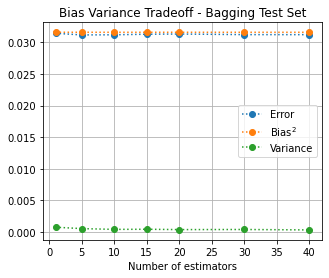

In [127]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(n_estimators,test_stats_bagging[0,:], 'o:', label='Error')
ax.plot(n_estimators,test_stats_bagging[1,:], 'o:', label='Bias$^2$')
ax.plot(n_estimators,test_stats_bagging[2,:], 'o:', label='Variance')
ax.set_title("Bias Variance Tradeoff - Bagging Test Set")
ax.set_xlabel('Number of estimators')
ax.grid()
ax.legend()

print ("Errro/Bias/Variance at the last iteration:", test_stats_bagging[:,-1])

Errore diminuito, varianza e bias costanti. 

Errro test - train at the last iteration: [0.03124027 0.02786674]


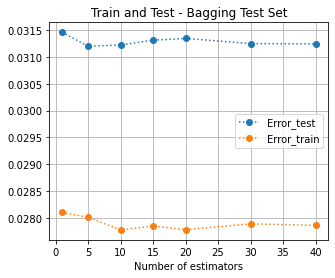

In [126]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(n_estimators,comparison_stats_bagging[0,:], 'o:', label='Error_test')
ax.plot(n_estimators,comparison_stats_bagging[1,:], 'o:', label='Error_train')
ax.set_title("Train and Test - Bagging Test Set")
ax.set_xlabel('Number of estimators')
ax.grid()
ax.legend()

print ("Errro test - train at the last iteration:", comparison_stats_bagging[:,-1])

In [74]:
tree_model = DecisionTreeRegressor(max_leaf_nodes = 7)
model_bagging = BaggingRegressor(tree_model, n_estimators = 15) 
model_bagging.fit(X_train_80,y_train_80)


train_mse= mean_squared_error(y_true=y_train_80, y_pred=model_bagging.predict(X_train_80))
test_mse  = mean_squared_error(y_true=y_test,  y_pred=model_bagging.predict(X_test))

print(train_mse)
print(test_mse)

0.02788325551875527
0.031197569592455347


# Best - Worst predictions

In [75]:
#best and worst instance
y_pred = model_bagging.predict(X_test)
errors = np.array([])
errors_pred = np.array([])
errors_test = np.array([])

for i in range(len(y_pred)):
    errors = np.append(errors, [abs(y_pred[i] - y_test.iloc[i])])
    
sorted_indxs = np.argsort(errors)
percent = int(len(errors)*10/100)
best_instances_tree = X_test.iloc[sorted_indxs[:percent]]
worst_instances__tree = X_test.iloc[sorted_indxs[-percent:]]

best_instances = errors[sorted_indxs[:percent]]
worst_instances = errors[sorted_indxs[-percent:]]

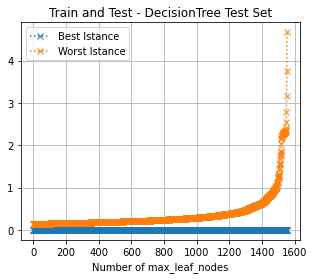

In [76]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(range(0,percent), best_instances, 'x:', label='Best Istance')
ax.plot(range(0,percent), worst_instances, 'x:', label='Worst Istance')
ax.set_title("Train and Test - DecisionTree Test Set")
ax.set_xlabel('Number of max_leaf_nodes')
ax.grid()
ax.legend()

Dal grafico si nota che dove la differenza è pari a 0, la predizione è avvenuta correttamente. Invece per le istanze la cui predizione non è avvenuta correttamente la differenza tende a crescere. 

Best-Worst prediction in base alla **latitudine**:
notiamo che la latidine dei test eseguiti è sempre uguale.

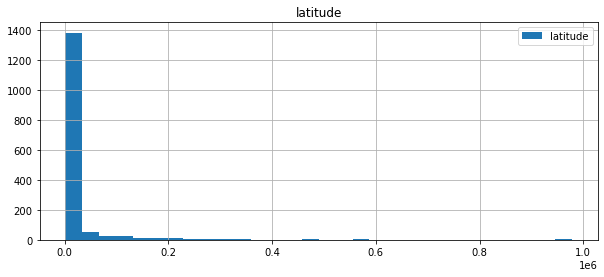

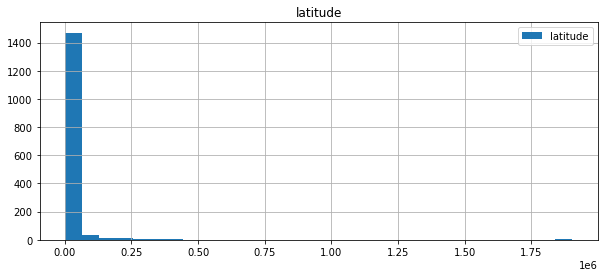

In [140]:
hist = best_instances_tree.hist(column='latitude', bins=30, figsize=(10, 4), legend=True)
hist = worst_instances__tree.hist(column='latitude', bins=30, figsize=(10, 4), legend=True)

Best-Worst prediction in base alla **longitude**: notiamo che la longitude per i parametri  delle istanze predette male si concentrano in un determinato range.

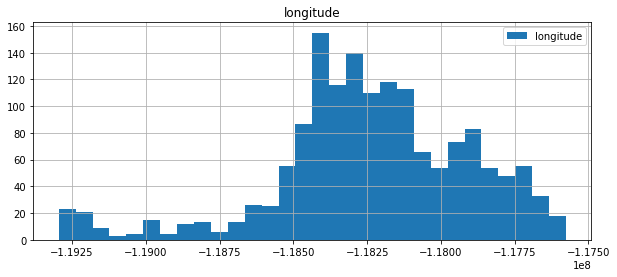

In [78]:
hist = best_instances_tree.hist(column='longitude', bins=30, figsize=(10, 4), legend=True)
hist = worst_instances__tree.hist(column='longitude', bins=30, figsize=(10, 4), legend=True)

Best-Worst prediction in base alla **yearbuilt**: notiamo che la yearbuilt per i parametri delle istanze predette male si concentrano in un determinato range.

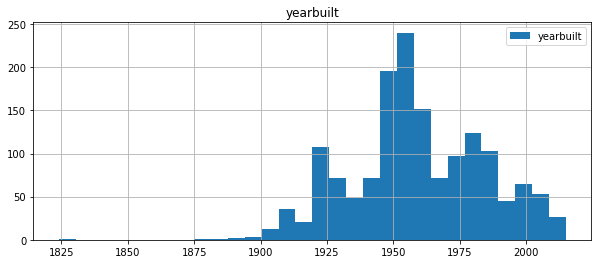

In [79]:
hist = best_instances_tree.hist(column='yearbuilt', bins=30, figsize=(10, 4), legend=True)
hist = worst_instances__tree.hist(column='yearbuilt', bins=30, figsize=(10, 4), legend=True)

Best-Worst prediction in base alla **value_ratio**: notiamo che la value_ratio per i parametri delle istanze predette male si concentrano in un determinato range.

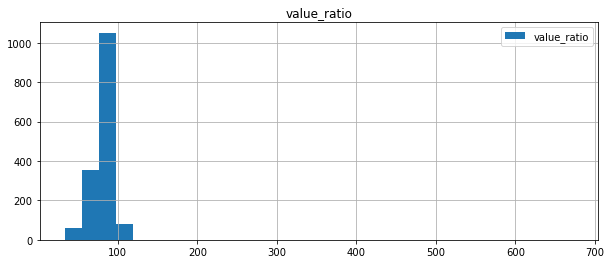

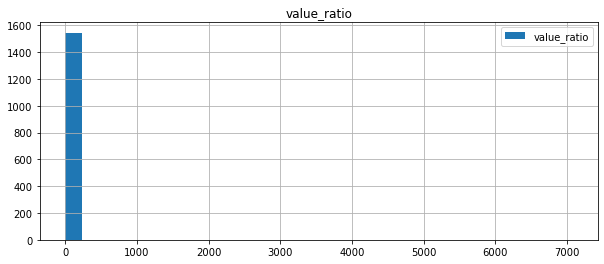

In [80]:
hist = best_instances_tree.hist(column='value_ratio' , bins=30, figsize=(10, 4), legend=True)
hist = worst_instances__tree.hist(column='value_ratio', bins=30, figsize=(10, 4), legend=True)

Best-Worst prediction in base alla **value_prop**: notiamo che la value_prop per i parametri delle istanze predette male si concentrano in un determinato range.

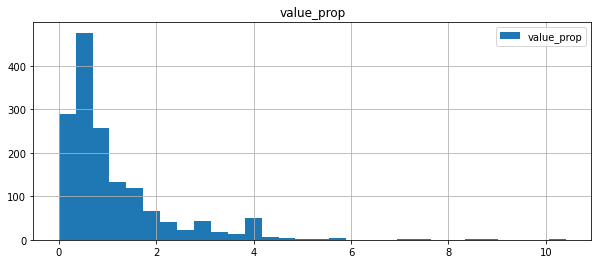

In [81]:
hist = best_instances_tree.hist(column='value_prop', bins=30, figsize=(10, 4), legend=True)
hist = worst_instances__tree.hist(column='value_prop', bins=30, figsize=(10, 4), legend=True)

Best-Worst prediction in base alla **regionidzip**: notiamo che la regionidzip per i parametri delle istanze predette è sempre simile

In [136]:
hist = best_instances_tree.hist(column='regionidzip', bins=30, figsize=(10, 4), legend=True)
hist = worst_instances__tree.hist(column='regionidzip', bins=30, figsize=(10, 4), legend=True)

Best-Worst prediction in base alla **rawcensustractandblock**: notiamo che la rawcensustractandblock cambia

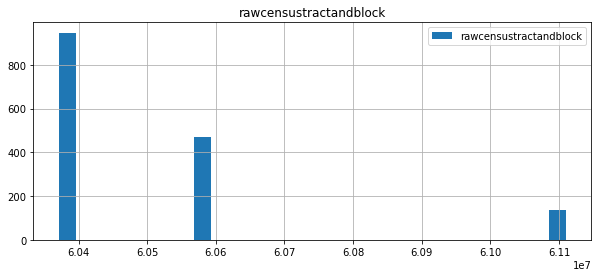

In [148]:
hist = best_instances_tree.hist(column='rawcensustractandblock', bins=30, figsize=(10, 4), legend=True)
hist = worst_instances__tree.hist(column='rawcensustractandblock', bins=30, figsize=(10, 4), legend=True)

Best-Worst prediction in base alla **taxdelinquencyyear**: notiamo come cambia

In [149]:
hist = best_instances_tree.hist(column='taxdelinquencyyear', bins=30, figsize=(10, 4), legend=True)
hist = worst_instances__tree.hist(column='taxdelinquencyyear', bins=30, figsize=(10, 4), legend=True)

# Boosting

Tuning su numero stimatori [1, 5 , 10, 15, 20, 30, 40] e su modello base un albero di decisione a 7 foglie

In [98]:
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

tree_model = DecisionTreeRegressor(max_leaf_nodes = 7)
parameters = {'base_estimator':[tree_model],'n_estimators':[1, 5 , 10, 15, 20, 30, 40]}
adaboost = AdaBoostRegressor()
boosts_search = GridSearchCV(estimator = adaboost, param_grid = parameters, cv=5, verbose = 1)
boosts_search.fit(X_train_80,y_train_80)

print ("Best Score: {:.3f}".format(boosts_search.best_score_) )
print ("Best Params: ", boosts_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Score: -0.013
Best Params:  {'base_estimator': DecisionTreeRegressor(max_leaf_nodes=7), 'n_estimators': 1}


In [102]:
comparison_stats_adaboost = np.array([])
test_stats_adaboost = np.array([])

n_estimators = [1, 5 , 10, 15, 20, 30, 40]

for l in n_estimators:
    
    tree_model = DecisionTreeRegressor(max_leaf_nodes = 7)
    adaboost_model = AdaBoostRegressor(tree_model, n_estimators = l)
    y_train_preds = np.array([])
    y_test_preds = np.array([])

    adaboost_model.fit(X_train_80, y_train_80)
           
    ##
    y_train_pred = adaboost_model.predict(X_train_80)
    y_test_pred = adaboost_model.predict(X_test)
    
    mean_predicted_train = [np.mean(y_train_pred)] * len(y_train_80)
    mean_predicted_test = [np.mean(y_test_pred)] * len(y_test)
    
    y_train_preds = np.column_stack( [y_train_preds, y_train_pred] ) if y_train_preds.size else y_train_pred
    y_test_preds = np.column_stack( [y_test_preds, y_test_pred] ) if y_test_preds.size else y_test_pred
                                                                            
    test_bias     = (y_test-np.mean(y_test_preds))**2
    test_variance = np.var(y_test_preds)
    test_error    = (y_test_preds - y_test)**2
    run_test_stats = np.array([test_error.mean(), test_bias.mean(), test_variance.mean()])
    test_stats_adaboost = np.column_stack( [test_stats_adaboost, run_test_stats]) if test_stats_adaboost.size else run_test_stats
    
    ##
    
    train_error    = (y_train_preds - y_train_80)**2
    run_comparison_stats = np.array([test_error.mean(), train_error.mean()])
    comparison_stats_adaboost = np.column_stack( [comparison_stats_adaboost, run_comparison_stats]) if comparison_stats_adaboost.size else run_comparison_stats
    
    ##

Errro/Bias/Variance at the last iteration: [0.11235825 0.06953702 0.04397154]


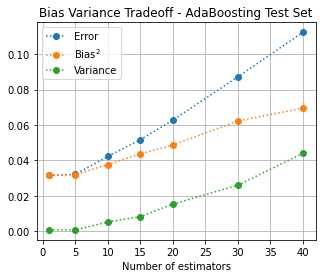

In [125]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(n_estimators,test_stats_adaboost[0,:], 'o:', label='Error')
ax.plot(n_estimators,test_stats_adaboost[1,:], 'o:', label='Bias$^2$')
ax.plot(n_estimators,test_stats_adaboost[2,:], 'o:', label='Variance')
ax.set_title("Bias Variance Tradeoff - AdaBoosting Test Set")
ax.set_xlabel('Number of estimators')
ax.grid()
ax.legend()

print ("Errro/Bias/Variance at the last iteration:", test_stats_adaboost[:,-1])

Notiamo come errore, bias e varianza peggiorano con l'aumentare del numero di stimatori

Errro test - train at the last iteration: [0.11235825 0.10639655]


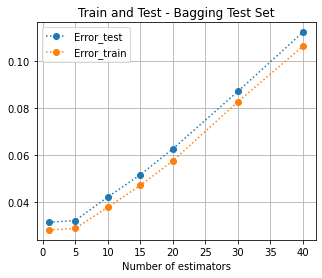

In [124]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(n_estimators,comparison_stats_adaboost[0,:], 'o:', label='Error_test')
ax.plot(n_estimators,comparison_stats_adaboost[1,:], 'o:', label='Error_train')
ax.set_title("Train and Test - Bagging Test Set")
ax.set_xlabel('Number of estimators')
ax.grid()
ax.legend()

print ("Errro test - train at the last iteration:", comparison_stats_adaboost[:,-1])

In [123]:
tree_model = DecisionTreeRegressor(max_leaf_nodes = 7)
model_bossting = AdaBoostRegressor(tree_model, n_estimators = 1) 
model_bossting.fit(X_train_80,y_train_80)


train_mse = mean_squared_error(y_true=y_train_80, y_pred=model_bossting.predict(X_train_80))
test_mse  = mean_squared_error(y_true=y_test,  y_pred=model_bossting.predict(X_test))

print(train_mse)
print(test_mse)

0.028250860102296004
0.03151050355384702


# Random Forest

Tuning su numero stimatori [10, 30, 50, 70, 100] e su modello base un albero di decisione a [7, 15, 20, 30, 40] foglie

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [10, 30, 50, 70, 100],
    'max_leaf_nodes': [7, 15, 20, 30, 40]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs=5,verbose = 3)

In [129]:
grid_search.fit(X_train_80, y_train_80)
print ("Best Score: {:.3f}".format(grid_search.best_score_) )
print ("Best Params: ", grid_search.best_params_)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best Score: -0.005
Best Params:  {'max_leaf_nodes': 7, 'n_estimators': 100}


In [131]:
#calcolare l'errore 
model_forest = RandomForestRegressor(max_leaf_nodes = 7,n_estimators=100)
model_forest.fit(X_train_80,y_train_80)

train_mse = mean_squared_error(y_true=y_train_80, y_pred=model_forest.predict(X_train_80))
test_mse  = mean_squared_error(y_true=y_test,  y_pred=model_forest.predict(X_test))


print(train_mse)
print(test_mse)

0.02784740949002228
0.03124468074572937


# Feature Importance and Feature Selection

In [132]:
model_forest.feature_importances_ #normallizzato a 1
#gratis con random forest, per ogni feature del nostro dataset l'errore

array([0.05305486, 0.02290406, 0.02990884, 0.        , 0.        ,
       0.00515293, 0.14168717, 0.        , 0.        , 0.00158196,
       0.        , 0.00133548, 0.03865991, 0.07030999, 0.        ,
       0.01098584, 0.        , 0.00610479, 0.        , 0.        ,
       0.00092355, 0.        , 0.02986596, 0.        , 0.01896042,
       0.01059275, 0.04867477, 0.01418746, 0.        , 0.        ,
       0.        , 0.        , 0.00187349, 0.003014  , 0.02062347,
       0.02451465, 0.        , 0.03402162, 0.0219626 , 0.00154055,
       0.        , 0.00190211, 0.        , 0.01123739, 0.        ,
       0.        , 0.02323908, 0.001581  , 0.        , 0.01706112,
       0.04831635, 0.        , 0.03338031, 0.03247671, 0.        ,
       0.01120824, 0.06384344, 0.01593854, 0.00657111, 0.05748871,
       0.00932139, 0.        , 0.00069459, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0013371 ,
       0.        , 0.        , 0.        , 0.        , 0.00387

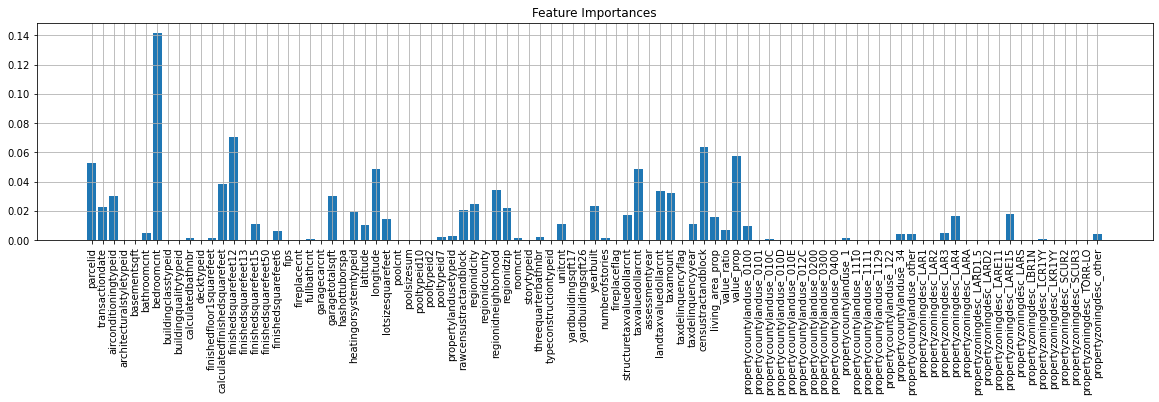

In [133]:
fig, ax = plt.subplots(figsize=(20,4))
ax.bar(range(0,X_train_80.shape[1]),model_forest.feature_importances_)
ax.set_title("Feature Importances")
ax.set_xticks(range(X_train_80.shape[1]))
ax.set_xticklabels(X_train_80.columns.values.tolist(),rotation=90)
ax.grid(); #contributo alla riduzione dell'errore

In [134]:
X_train_80.columns.values.tolist()

['parcelid',
 'transactiondate',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'fireplaceflag',
 'structuretaxvaluedol